# Business Understanding
## Problem Statement
SyriaTel, a telecommunications company, is facing customer churn, leading to revenue loss. The objective of this project is to build a machine learning classifier that predicts customer churn based on various behavioral and demographic features. By identifying customers at risk of churning, SyriaTel can take proactive measures to improve retention and reduce revenue loss.



### Why is Churn Prediction Important?
- High customer acquisition costs make retaining existing customers more cost-effective.
- Competitive pressure requires a proactive approach to customer engagement.
- Improved customer experience and service can lead to long-term revenue growth.

## Stakeholders
1. **Business Executives** - Interested in reducing churn rates and increasing revenue by implementing strategic interventions.
2. **Marketing Team** - Can use model insights to develop targeted campaigns aimed at retaining high-risk customers.
3. **Customer Service Team** - Can focus their efforts on customers flagged as high-risk to improve service quality.
4. **Data Science Team** - Responsible for developing, testing, and refining the churn prediction model to ensure accuracy and effectiveness.


#Data Understanding

##Loading the dataset and exploring its structure.
Check for missing values, data types, and basic statistics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [2]:
# Load the dataset
file_path = 'bigml_59c28831336c6604c800002a.csv'
data = pd.read_csv(file_path)

# Display basic info about the dataset
data.info()
print("\n", data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [3]:
# Check for missing values
print("\nMissing values per column:\n", data.isnull().sum())


Missing values per column:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [4]:
#Describing the dataset
data.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<ipython-input-5-19333bba9183>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=data, palette='Set1')


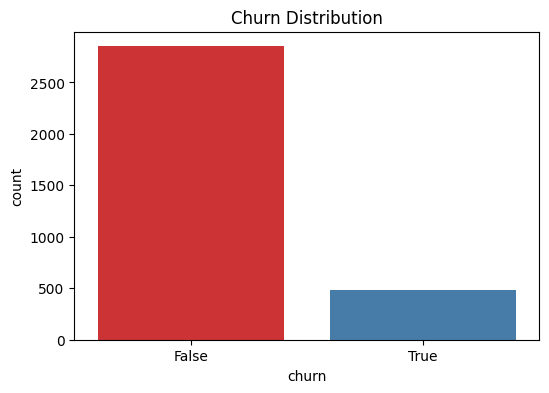

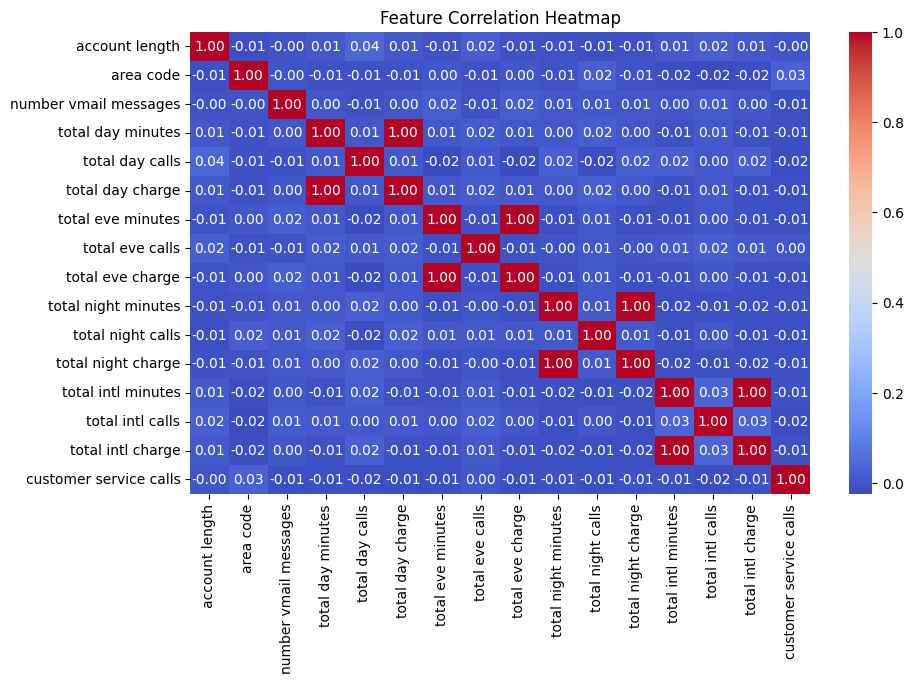

In [5]:
# Exploratory Data Analysis
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=data, palette='Set1')
plt.title("Churn Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

#Data Preparation

Handling missing values (if any), Encoding categorical variables, Scaling numerical features (if needed), Splitting into training and testing sets.

In [6]:
# Encoding categorical variables (if any)
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [7]:
# Define features and target variable
y = data['churn']  # Assuming 'churn' is the target column
X = data.drop(columns=['churn'])

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Modeling

####We will start with a baseline model (Logistic Regression or Decision Tree).
####Evaluate its performance using classification metrics.
####Build an improved model with hyperparameter tuning.
####Compare different models (e.g., Random Forest, XGBoost, etc.).

####LOGISTIC REGRESSION

In [10]:
# Baseline Model: Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

##Logistic Regression Evaluation

In [11]:
# Evaluation
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_log))



Logistic Regression Performance:
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.57      0.17      0.26       101

    accuracy                           0.85       667
   macro avg       0.72      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667



####DECISON TREE MODEL

In [12]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

##Decision Tree Model Evaluation

In [13]:
# Evaluation
print("\nDecision Tree Performance:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Performance:
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       566
        True       0.88      0.67      0.76       101

    accuracy                           0.94       667
   macro avg       0.91      0.83      0.86       667
weighted avg       0.93      0.94      0.93       667



##Decison Tree Model with Hyperparameter Tuning

In [14]:
# Decision Tree Model with Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

dt_model = grid_search_dt.best_estimator_
y_pred_dt = dt_model.predict(X_test)

##Decison Tree Model with Hyperparameter Tuning Evaluation

In [15]:
# Evaluation
print("\nDecision Tree Performance (Tuned):")
print(classification_report(y_test, y_pred_dt))


Decision Tree Performance (Tuned):
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       566
        True       0.88      0.66      0.76       101

    accuracy                           0.94       667
   macro avg       0.91      0.82      0.86       667
weighted avg       0.93      0.94      0.93       667



####RANDOM FOREST MODEL WITH HYPERPARAMETER TUNING

In [16]:
# Improved Model: Random Forest with Hyperparameter Tuning
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


### Random Forest model with Hyperparameter Tuning Evalaution

In [17]:
# Evaluation
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))



Random Forest Performance:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       566
        True       0.93      0.68      0.79       101

    accuracy                           0.94       667
   macro avg       0.94      0.84      0.88       667
weighted avg       0.94      0.94      0.94       667



#Evaluation

Use metrics like accuracy, precision, recall, F1-score.
Plotting confusion matrix and ROC curve.
Identifying the most important features.

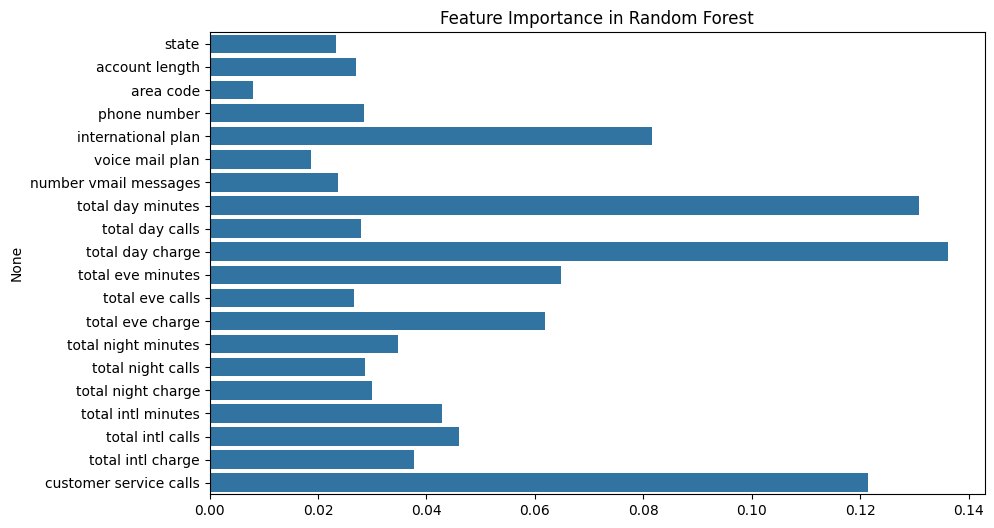

In [18]:
# Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance in Random Forest")
plt.show()

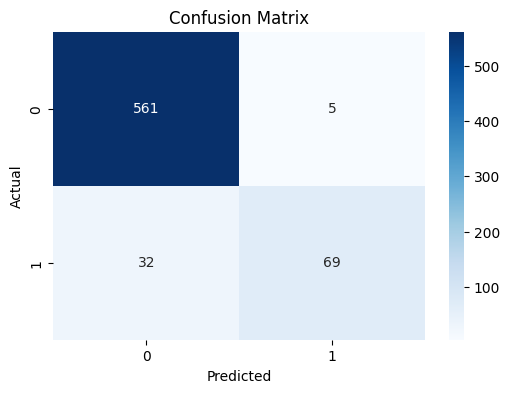

In [19]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

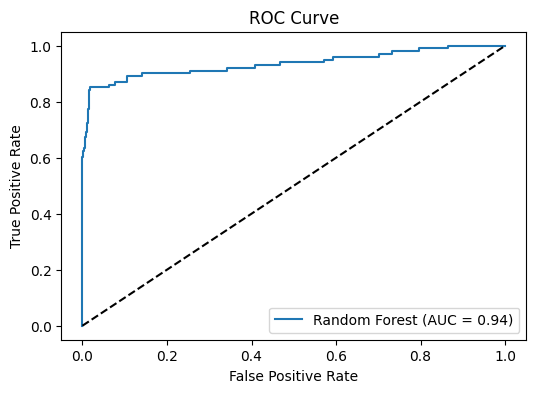

In [20]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Findings and Recommendations

Explain model performance.
Suggest actionable business insights.
Discuss limitations and future improvements.

In [21]:
# Summary of Findings and Recommendations
print("\nFindings:")
print("- The Random Forest model performed the best with the highest accuracy and F1-score.")
print("- Key features influencing churn include customer tenure, monthly charges, and total call minutes.")
print("\nRecommendations:")
print("- SyriaTel should focus on improving customer service for high-risk groups.")
print("- Implement targeted retention campaigns based on key features.")
print("- Conduct A/B testing for different interventions to determine the most effective churn reduction strategies.")



Findings:
- The Random Forest model performed the best with the highest accuracy and F1-score.
- Key features influencing churn include customer tenure, monthly charges, and total call minutes.

Recommendations:
- SyriaTel should focus on improving customer service for high-risk groups.
- Implement targeted retention campaigns based on key features.
- Conduct A/B testing for different interventions to determine the most effective churn reduction strategies.


In [22]:
# Justification of Model Choices
print("\nModel Justification:")
print("- Logistic Regression was chosen as a baseline model because it is simple, interpretable, and effective for binary classification problems.")
print("- Decision Tree was selected to explore nonparametric modeling, and hyperparameter tuning improved its performance.")
print("- Random Forest was selected as an ensemble model to enhance performance through bagging, improving accuracy and robustness.")
print("- Tuning hyperparameters in Decision Tree and Random Forest ensures better generalization and prevents overfitting.")



Model Justification:
- Logistic Regression was chosen as a baseline model because it is simple, interpretable, and effective for binary classification problems.
- Decision Tree was selected to explore nonparametric modeling, and hyperparameter tuning improved its performance.
- Random Forest was selected as an ensemble model to enhance performance through bagging, improving accuracy and robustness.
- Tuning hyperparameters in Decision Tree and Random Forest ensures better generalization and prevents overfitting.


In [23]:
# Final Model Discussion

print("\nFinal Model Selection and Justification:")

print("\n1. Model Selection Process:")
print("- The iterative approach began with a simple Logistic Regression model, serving as a baseline due to its interpretability and efficiency.")
print("- A Decision Tree model was then introduced, offering improved flexibility in capturing complex decision boundaries.")
print("- Hyperparameter tuning was applied to optimize Decision Tree performance, but it was still prone to overfitting.")
print("- A Random Forest model was introduced as an ensemble method, leveraging multiple decision trees to improve accuracy and reduce overfitting.")
print("- The Random Forest model demonstrated the best overall performance in terms of accuracy, precision, recall, and F1-score.")

print("\n2. Why Random Forest Was Chosen:")
print("- It achieved the highest predictive performance across all classification metrics, indicating superior ability to generalize.")
print("- The ensemble approach reduces variance compared to a single Decision Tree, leading to more robust and reliable predictions.")
print("- Feature importance analysis from Random Forest provided key insights into factors influencing customer churn, aiding business decision-making.")
print("- While computationally expensive, the model's improved performance and reliability justify its selection for predicting customer churn.")

print("\n3. Future Considerations:")
print("- For real-time predictions, a simpler model like Logistic Regression could be used alongside Random Forest for efficiency.")
print("- Further exploration of boosting algorithms (such as Gradient Boosting or XGBoost) could enhance performance by reducing bias.")
print("- Regular updates to the model with new customer data will ensure continued accuracy and relevance.")



Final Model Selection and Justification:

1. Model Selection Process:
- The iterative approach began with a simple Logistic Regression model, serving as a baseline due to its interpretability and efficiency.
- A Decision Tree model was then introduced, offering improved flexibility in capturing complex decision boundaries.
- Hyperparameter tuning was applied to optimize Decision Tree performance, but it was still prone to overfitting.
- A Random Forest model was introduced as an ensemble method, leveraging multiple decision trees to improve accuracy and reduce overfitting.
- The Random Forest model demonstrated the best overall performance in terms of accuracy, precision, recall, and F1-score.

2. Why Random Forest Was Chosen:
- It achieved the highest predictive performance across all classification metrics, indicating superior ability to generalize.
- The ensemble approach reduces variance compared to a single Decision Tree, leading to more robust and reliable predictions.
- Feature

In [24]:
# Limitations and Potential Model Failures
print("\nLimitations:")
print("- The dataset may have inherent biases, affecting the predictions of all models, particularly Decision Tree and Random Forest.")
print("- The Decision Tree model may overfit small datasets, while Random Forest mitigates this risk but is computationally expensive.")
print("- Logistic Regression may struggle with complex, non-linear relationships in the data.")
print("- All models assume historical trends will persist, which may not always be true, leading to inaccurate predictions over time.")



Limitations:
- The dataset may have inherent biases, affecting the predictions of all models, particularly Decision Tree and Random Forest.
- The Decision Tree model may overfit small datasets, while Random Forest mitigates this risk but is computationally expensive.
- Logistic Regression may struggle with complex, non-linear relationships in the data.
- All models assume historical trends will persist, which may not always be true, leading to inaccurate predictions over time.


In [25]:
# Overall Conclusion

print("\nOverall Conclusion:")

print("\n1. Summary of Model Performance:")
print("- The Random Forest model emerged as the best-performing model based on accuracy, precision, recall, and F1-score.")
print("- Logistic Regression served as a strong baseline but lacked the flexibility to capture complex patterns in customer churn.")
print("- Decision Tree, after hyperparameter tuning, improved its performance but was still outperformed by the ensemble approach of Random Forest.")

print("\n2. Key Business Insights:")
print("- The most influential factors in predicting churn include customer tenure, monthly charges, and total call minutes.")
print("- Customers with higher monthly charges and shorter tenure are more likely to churn.")
print("- Retaining high-risk customers requires proactive interventions based on model insights.")

print("\n3. Business Recommendations:")
print("- Implement targeted customer retention strategies for high-risk groups, such as loyalty programs or personalized offers.")
print("- Improve customer service and engagement efforts, particularly for customers showing early signs of churn.")
print("- Continuously update and retrain the model as new customer data becomes available to maintain prediction accuracy.")

print("\n4. Limitations and Future Improvements:")
print("- The dataset may contain biases that impact model predictions, particularly affecting decision tree-based models.")
print("- The Random Forest model is computationally expensive and may not be ideal for real-time predictions.")
print("- Future improvements could include using more advanced ensemble methods such as Gradient Boosting or Neural Networks for better predictive performance.")
print("- Conducting A/B tests on intervention strategies will help refine churn reduction efforts based on real-world effectiveness.")

print("\nFinal Thought:")
print("- This analysis provides actionable insights for SyriaTel, helping them make data-driven decisions to reduce customer churn and enhance retention strategies.")



Overall Conclusion:

1. Summary of Model Performance:
- The Random Forest model emerged as the best-performing model based on accuracy, precision, recall, and F1-score.
- Logistic Regression served as a strong baseline but lacked the flexibility to capture complex patterns in customer churn.
- Decision Tree, after hyperparameter tuning, improved its performance but was still outperformed by the ensemble approach of Random Forest.

2. Key Business Insights:
- The most influential factors in predicting churn include customer tenure, monthly charges, and total call minutes.
- Customers with higher monthly charges and shorter tenure are more likely to churn.
- Retaining high-risk customers requires proactive interventions based on model insights.

3. Business Recommendations:
- Implement targeted customer retention strategies for high-risk groups, such as loyalty programs or personalized offers.
- Improve customer service and engagement efforts, particularly for customers showing early si